In [33]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv('datapoker.data')

In [7]:
data.shape

(999999, 11)

In [8]:
data.head()

,1,1.1,1.2,13,2,4,2.1,3,1.3,12,0
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


In [10]:
data.columns = ['first_suit', 'first_rank', 'second_suit', 'second_rank', 'third_suit', 'third_rank',
'fourth_suit', 'fourth_rank', 'fifth_suit', 'fifth_rank', 'hand']

labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush', 'full_house',
'four_of_a_kind', 'straight_flush', 'royal_flush']


In [11]:
data

,first_suit,first_rank,second_suit,second_rank,third_suit,third_rank,fourth_suit,fourth_rank,fifth_suit,fifth_rank,hand
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...
999994,3,1,1,12,2,9,4,9,2,6,1
999995,3,3,4,5,2,7,1,4,4,3,1
999996,1,11,4,7,3,9,1,13,2,7,1
999997,3,11,1,8,1,1,3,13,2,8,1


In [12]:
data.isna().sum()

first_suit     0
first_rank     0
second_suit    0
second_rank    0
third_suit     0
third_rank     0
fourth_suit    0
fourth_rank    0
fifth_suit     0
fifth_rank     0
hand           0
dtype: int64

In [13]:
data.describe()

,first_suit,first_rank,second_suit,second_rank,third_suit,third_rank,fourth_suit,fourth_rank,fifth_suit,fifth_rank,hand
count,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000
mean,2.500495,6.997933,2.499895,7.006091,2.500872,6.998876,2.500394,7.002302,2.499452,6.989476,0.616903
std,1.117767,3.743371,1.118568,3.743478,1.118225,3.741891,1.117246,3.741270,1.118948,3.739893,0.773377
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,2.000000,7.000000,0.000000
75%,3.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,4.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   first_suit   999999 non-null  int64
 1   first_rank   999999 non-null  int64
 2   second_suit  999999 non-null  int64
 3   second_rank  999999 non-null  int64
 4   third_suit   999999 non-null  int64
 5   third_rank   999999 non-null  int64
 6   fourth_suit  999999 non-null  int64
 7   fourth_rank  999999 non-null  int64
 8   fifth_suit   999999 non-null  int64
 9   fifth_rank   999999 non-null  int64
 10  hand         999999 non-null  int64
dtypes: int64(11)
memory usage: 83.9 MB


In [15]:
data.hand.value_counts()

0    501208
1    422498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
Name: hand, dtype: int64

In [17]:
### 4) SEPERATING THE DATASET INTO FEATURES (X) AND TARGET VALUES (y)
X = data.iloc[:, 0:9]
y = data.hand

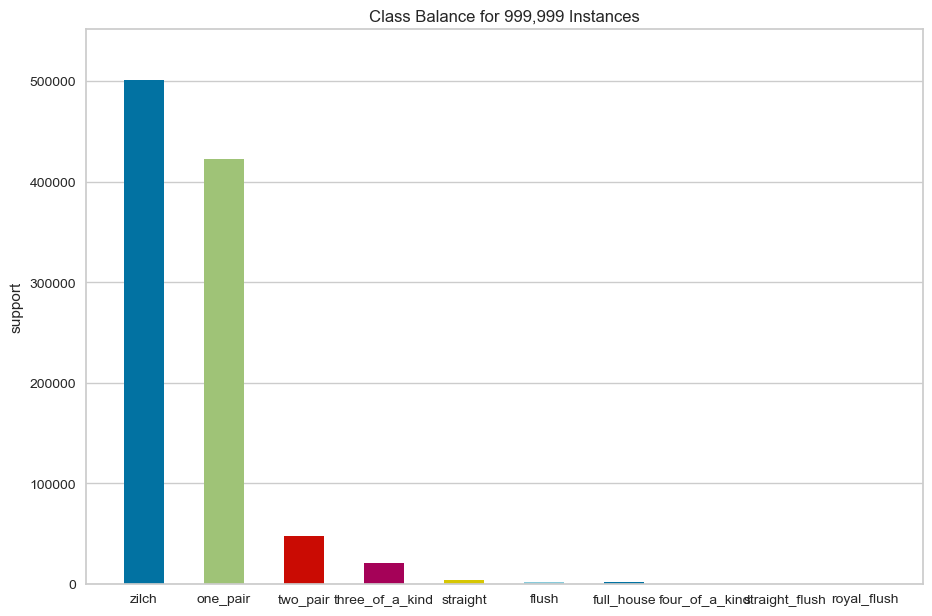

<AxesSubplot:title={'center':'Class Balance for 999,999 Instances'}, ylabel='support'>

In [22]:
#VISUALIZING WHETHER CLASS BALANCE IS PRESENT IN OUR DATASET OR NOT
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassPredictionError

balance = ClassBalance(size=(1080,720), labels=labels)

balance.fit(y)

balance.show()

**THUS THERE IS CLASS IMBALANCE PRESENT IN OUR DATASET, ANS WE MUST REMOVE IT**

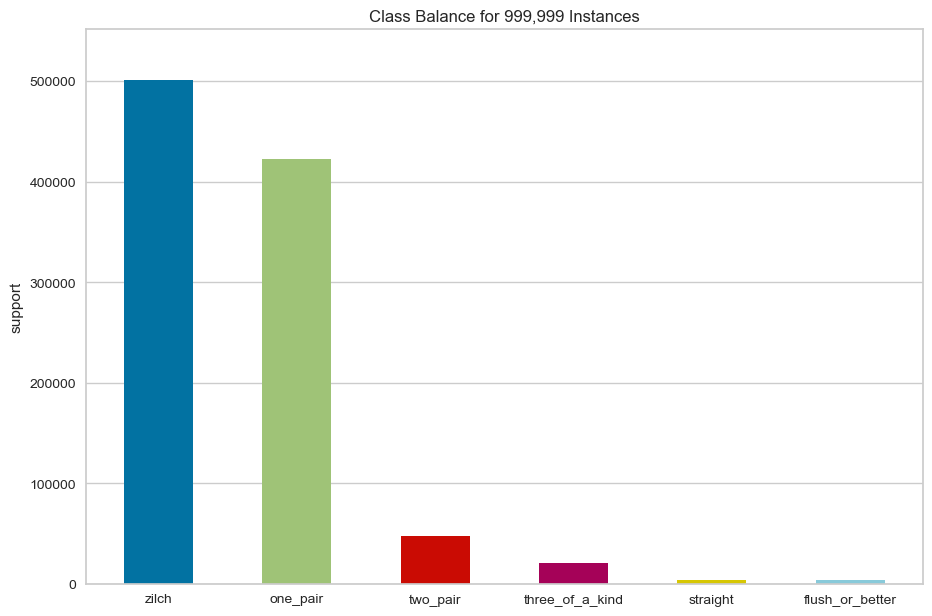

<AxesSubplot:title={'center':'Class Balance for 999,999 Instances'}, ylabel='support'>

In [26]:
#UP-SAMPLING FROM MINORITY CLASSES
data.loc[data['hand']>=5, 'hand'] = 5

y = data.hand

labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush_or_better']

balance = ClassBalance(size=(1080,720), labels=labels)

balance.fit(y)

balance.show()

In [27]:
#TRAINING THE RANDOM FORESTS CLASSIFIER
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,random_state=42)

#CLF = SVC()
CLF = MLPClassifier(solver = 'adam', alpha = 0.05, hidden_layer_sizes=(50, 100, 50), learning_rate = 'adaptive', activation = 'tanh')

CLF.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(50, 100, 50),
              learning_rate='adaptive')

In [28]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score

y_pred_test = CLF.predict(X_test)
y_pred_train = CLF.predict(X_train)

print ("Accuracy of the Model on Train Data is : {}".format(accuracy_score(y_train, y_pred_train)))
print ("Accuracy of the Model on Test Data is : {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy of the Model on Train Data is : 0.7757095514191028
Accuracy of the Model on Test Data is : 0.774952


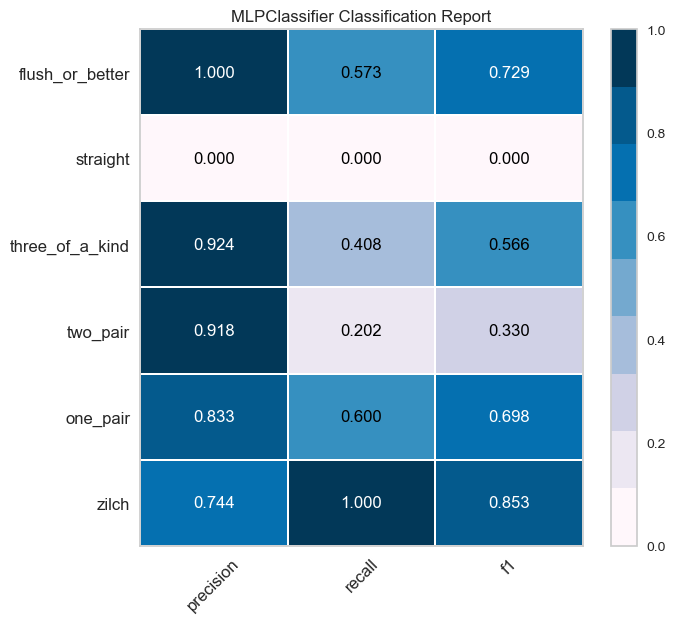

<AxesSubplot:title={'center':'MLPClassifier Classification Report'}>

In [34]:
#CLASSIFICATION REPORT HEATMAP
from yellowbrick.classifier import ClassificationReport

report = ClassificationReport(CLF, size = (720, 640), classes = labels, cmap = 'PuBu')
report.score(X_test, y_test)
report.show()

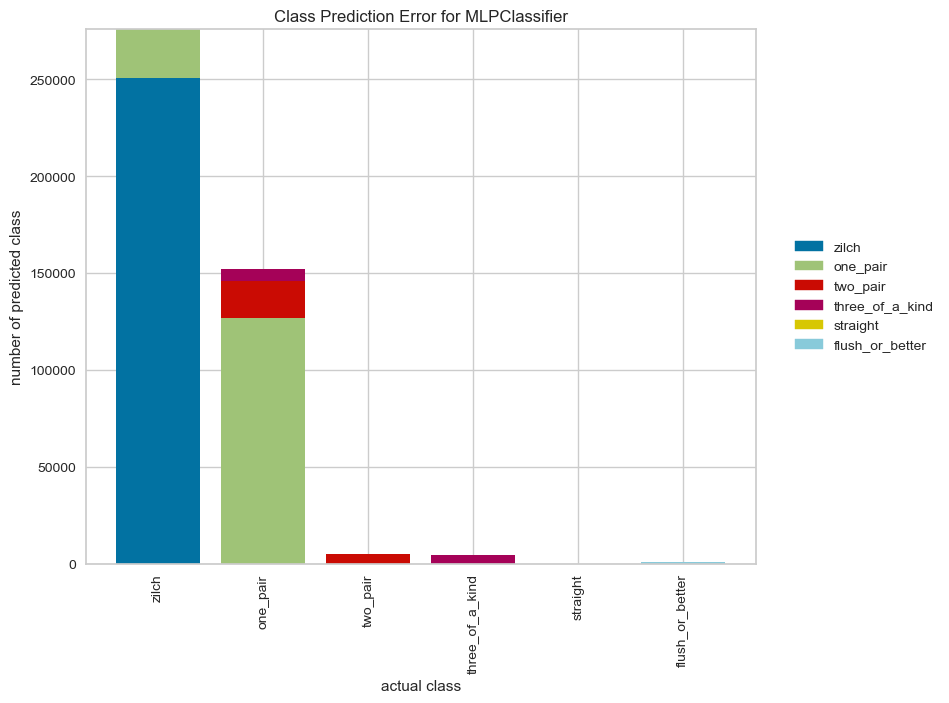

<AxesSubplot:title={'center':'Class Prediction Error for MLPClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [35]:
#CLASS PREDICTION ERROR
error = ClassPredictionError(CLF, size= [1080, 720], classes = labels)
error.score(X_test, y_test)
error.poof()